In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170508288/170498071 [==============================] - 4270s 25us/step


In [4]:
print("Shapes: ")
print(f"X Train Shape: {X_train.shape}")
print(f"X Test Shape: {X_test.shape}")
print(f"y Train Shape: {y_train.shape}")
print(f"y Train Shape: {y_test.shape}")

Shapes: 
X Train Shape: (50000, 32, 32, 3)
X Test Shape: (10000, 32, 32, 3)
y Train Shape: (50000, 1)
y Train Shape: (10000, 1)


In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

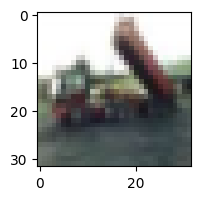

In [10]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[2])

### Making it a function for convenience

In [11]:
def show(X,y,index):
    plt.figure(figsize=(15,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

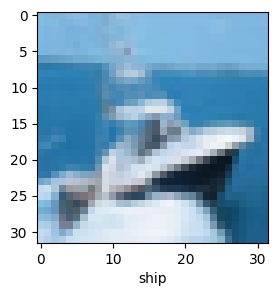

In [13]:
show(X_train,y_train,8)

In [14]:
X_train = X_train/255

In [15]:
X_test = X_test/255

In [84]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [85]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
history = cnn_model.fit(X_train, y_train, epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6136 - accuracy: 0.4045 - val_loss: 1.3581 - val_accuracy: 0.4970
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2616 - accuracy: 0.5472 - val_loss: 1.1927 - val_accuracy: 0.5727
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1024 - accuracy: 0.6107 - val_loss: 1.0917 - val_accuracy: 0.6176
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9910 - accuracy: 0.6500 - val_loss: 0.9924 - val_accuracy: 0.6558
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9047 - accuracy: 0.6846 - val_loss: 0.9503 - val_accuracy: 0.6686
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8342 - accuracy: 0.7076 - val_loss: 0.9475 - val_accuracy: 0.6730
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7709 - accuracy: 0.7308 - val_loss: 0.9314 - val_accuracy

In [87]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.1486 - accuracy: 0.6824


[2.148566722869873, 0.6823999881744385]

#### Model conclusively reports 68.2% Accuracy on the Test Data

## Plotting the Accuracies and the Losses

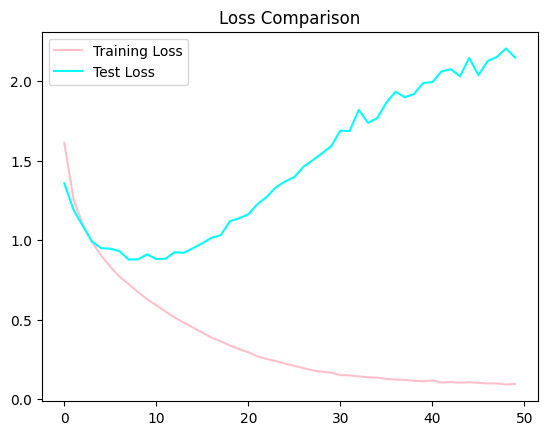

In [90]:
plt.title("Loss Comparison")
plt.plot(history.history["loss"],label="Training Loss",c="pink")
plt.plot(history.history["val_loss"],label= "Test Loss",c="cyan")
plt.legend()
plt.show()

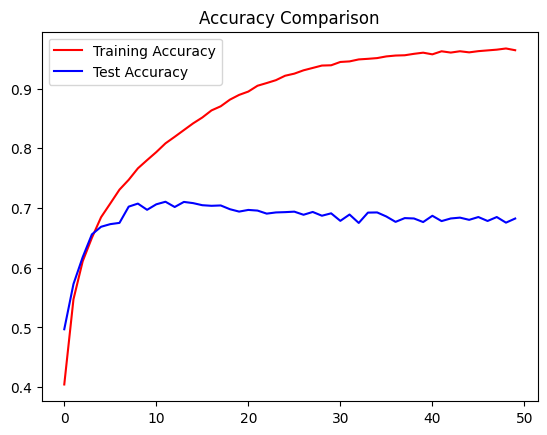

In [91]:
plt.title("Accuracy Comparison")
plt.plot(history.history["accuracy"],label="Training Accuracy",c="red")
plt.plot(history.history["val_accuracy"],label = "Test Accuracy",c="blue")
plt.legend()
plt.show()

#### Classification using model and given test data

In [92]:
y_pred = cnn_model.predict(X_test)

In [93]:
y_pred

array([[1.4475376e-06, 3.0291957e-07, 1.8207872e-01, ..., 1.4962925e-18,
        3.8479397e-05, 7.4895816e-08],
       [9.0205667e-06, 6.3761829e-05, 1.1246608e-14, ..., 4.3086445e-17,
        9.9992716e-01, 7.1797919e-09],
       [1.3901205e-04, 1.6393217e-04, 3.0564850e-06, ..., 2.8314450e-14,
        9.9962807e-01, 3.2877895e-05],
       ...,
       [8.5596076e-19, 2.3674878e-19, 1.1916675e-08, ..., 5.8858181e-09,
        5.6698166e-15, 9.9490161e-15],
       [2.3395476e-04, 9.9973899e-01, 1.2376282e-10, ..., 8.6529045e-10,
        6.0621085e-11, 2.4864070e-05],
       [4.9367528e-20, 1.1177968e-21, 1.2290139e-13, ..., 9.9833822e-01,
        1.2697202e-22, 3.7103550e-21]], dtype=float32)

In [94]:
y_pred = [np.argmax(y) for y in y_pred]

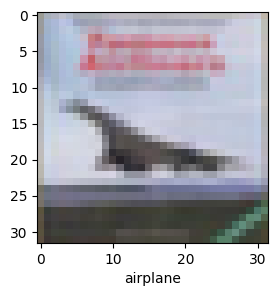

In [95]:
show(X_test,y_test,3)

In [96]:
print(f"Model Prediction is -> {classes[y_pred[3]]}")

Model Prediction is -> airplane


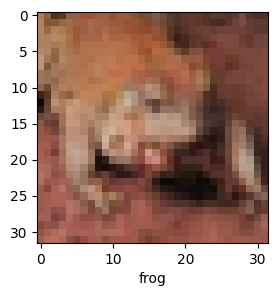

In [97]:
show(X_test,y_test,5)

In [101]:
print(f"Model Prediction is -> {classes[y_pred[5]]}")

Model Prediction is -> frog


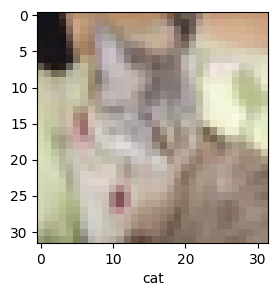

In [102]:
show(X_test,y_test,8)

In [103]:
print(f"Model Prediction is -> {classes[y_pred[8]]}")

Model Prediction is -> deer


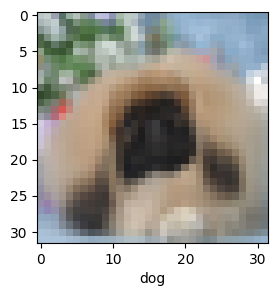

In [104]:
show(X_test,y_test,250)

In [105]:
print(f"Model Prediction is -> {classes[y_pred[250]]}")

Model Prediction is -> dog
